###Questioin 3###

####part a####


question and intro: Elucidate the mathematical intuition for Basis
Encoding and Amplitude Encoding by providing two examples. Use Qiskit(IBM) to demonstrate each method.

***basis embedding:***

Basis embedding associates each input with a computational basis state of a qubit system. Therefore, classical data has to be in the form of binary strings. The embedded quantum state is the bit-wise translation of a binary string to the corresponding states of the quantum subsystems. For example, x = 1001 is represented by the 4-qubit state |1001>. Hence, one bit of classical information is represented by one quantum subsystem.

Let's consider the classical dataset D mentioned above. For basis embedding, each example has to be a N-bit binary string; X_m = (b_1,...,b_n) with b_i in [0,1]. for i = 1,...,N. Assuming all features are represented with unit binary precision (one bit), each input example X_m can be directly mapped to the quantum state |X_m>. This means that the number of n, must be at least equal to N.

An entire dataset can be represented in superpositions of computational basis states as

$|D> = (1/\sqrt{M})\Sigma_0^M{|X_m>}$

For example, let's say we have a classical dataset containing two examples: X_1 = 10 and X_2 = 11. The corresponding basis encoding uses two qubits to represent |X_1> = |01> and |X_2> = |11>. resulting in:

$|D> = (1/\sqrt{2})(|01> + |11>)$

***amplitude embedding:***

Amplitude encoding is a method of representing classical data in the amplitudes of a quantum state. This enables efficient representation of classical information in quantum systems.

### Mathematical Intuition:

Given a classical data vector $( x = [x_1, x_2, \ldots, x_N] )$, amplitude encoding represents this vector as a quantum state $( |\psi\rangle $) where the elements of the classical vector are encoded in the amplitudes of the quantum state's basis states.

#### Steps to Encode Classical Data into a Quantum State:

1. **Normalize the Classical Vector**:
   - Normalize the classical data vector $( x $) to form a valid quantum state $( |\psi\rangle $). A quantum state $( |\psi\rangle $) must satisfy the normalization condition:
     $[ \sum_{i=1}^{N} |a_i|^2 = 1 $]
   - Normalize $( x $) as $( x' = \frac{x}{||x||} $), where $( ||x|| $) is the Euclidean norm of $( x $): $( ||x|| = \sqrt{\sum_{i=1}^{N} x_i^2} $).

2. **Map Normalized Vector to Quantum State**:
   - Use the normalized vector $( x' = [x'_1, x'_2, \ldots, x'_N] $) to form the quantum state: $ [|\psi\rangle = x'_1|0\ldots0\rangle + x'_2|0\ldots1\rangle + \ldots + x'_N N-1\rangle $]
   where $( |0\ldots0\rangle, |0\ldots1\rangle, \ldots, |N-1\rangle $) are the basis states of the quantum system.

### Example with a 2-Qubit System:

Consider a classical data vector $( x = [1, 2, 3, 4] $). We want to encode this vector into the amplitudes of a 2-qubit quantum state.

1. **Normalize the Vector**:
   - $( ||x|| = \sqrt{1^2 + 2^2 + 3^2 + 4^2} = \sqrt{30} $)
   - $( x' = \left[\frac{1}{\sqrt{30}}, \frac{2}{\sqrt{30}}, \frac{3}{\sqrt{30}}, \frac{4}{\sqrt{30}}\right] $)

2. **Map to Quantum State**:
   - The normalized vector is mapped to the 2-qubit quantum state:
     $[ |\psi\rangle = \frac{1}{\sqrt{30}}|00\rangle + \frac{2}{\sqrt{30}}|01\rangle + \frac{3}{\sqrt{30}}|10\rangle + \frac{4}{\sqrt{30}}|11\rangle $]

***coding examples:***

first we install and import the neccesary libraries:

In [4]:
!pip install qiskit==0.46.0
!pip install pylatexenc
!pip install qiskit-aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_state_qsphere
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4dd7cab0ee15257dc2e03ee7287817bfe19204602692d53083681c90df275d6e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

**basis encoding**

here we make a classical binary data (let's say 47) and convert it to binary:

In [5]:
data_point = 47
binary_rep = "101111"

now we need 6 qubits. here we define a function to make our quantum circuit and put x on the way of corresponding 1s:

In [6]:
def make_qc(binary_num):
  num_qubits = len(binary_num)
  qc = QuantumCircuit(num_qubits)
  for i, bit in enumerate(binary_num):
    if bit == '1':
        qc.x(i)
  return qc

now we make and draw our circuit:

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


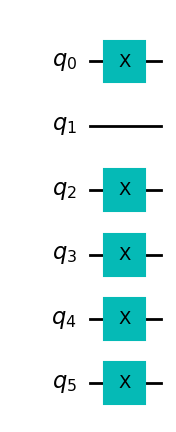

In [7]:
qc = make_qc(binary_rep)
qc.draw('mpl')

Amplitude encoding:

First we define a classical data vector containing four elements: [1, 2, 3, 4].

In [9]:
classical_vector = np.array([1, 2, 3, 4])

Here we calculate the Euclidean norm of the classical vector using np.linalg.norm(). Then, we normalize the classical vector by dividing each element by its norm.

In [13]:
norm = np.linalg.norm(classical_vector)
normalized_vector = classical_vector / norm
normalized_vector

array([0.18257419, 0.36514837, 0.54772256, 0.73029674])

We create a quantum circuit qc_amplitude with two qubits (to represent four datapoints) using QuantumCircuit(2). The initialize method initializes the qubits of the quantum circuit to represent the normalized classical vector. Then we add measure to all qubits.

In [11]:
qc_amplitude = QuantumCircuit(2)
qc_amplitude.initialize(normalized_vector, [0, 1])

Here we draw our circuit.

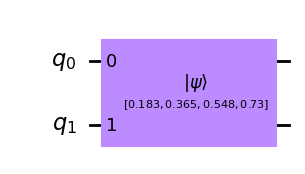

In [12]:
qc_amplitude.draw('mpl')

<hr>

####part B####

question and intro: Explain the following Quantum Circuit and use Qiskit to create it.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


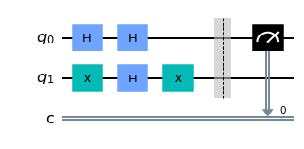

In [15]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename = "/content/drive/MyDrive/ai-project-2/q3/gate.jpg",width = 500,height = 300)

first we build the overall circuit. we have two qubits and one bit, therefore:

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q=QuantumRegister(2)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

for the first qubit we have to consequent hadamard gates applying on it's initial value which is $|0\rangle$.

The Hadamard gate (H) is represented by the following matrix:

$[
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$]

When it's applied for the first time on $|0\rangle$


$[
H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix}
$]

and appling it for the second time:

$[
H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$ = $|0\rangle]$

In [17]:
qc.h(0)
qc.h(0)

for the second qubit we have a pauli X gate, followd by a hadamard gate and them another pauli x gate. matrix operations will be as follows:

X∣0⟩=(01​10​)(10​)=(01​)=∣1⟩

The X gate is represented by the following matrix:

$[
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$]

When the X gate is applied to $(|0\rangle$):

$[
X |0\rangle = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \begin{pmatrix}
0 \\
1
\end{pmatrix} = |1\rangle
$]

   The Hadamard gate (H) is represented by the following matrix:

   $[
   H = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix}
   $]

   When the Hadamard gate is applied to $(|1\rangle$):

   $[
   H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix} \begin{pmatrix}
   0 \\
   1
   \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
   $]


   When we apply the X gate again to the state $(\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$):
   $[
   X \left( \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} \right) = \frac{1}{\sqrt{2}} \begin{pmatrix}
   0 & 1 \\
   1 & 0
   \end{pmatrix} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
   -1 \\
   1
   \end{pmatrix} = \frac{1}{\sqrt{2}} (|1\rangle - |0\rangle)
   $]



In [18]:
qc.x(1)
qc.h(1)
qc.x(1)

then we must add a barrier:

In [19]:
qc.barrier()

in finale step we must add measure to the first qubit:

In [20]:
qc.measure(0,c)

finally we draw the circuit:

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


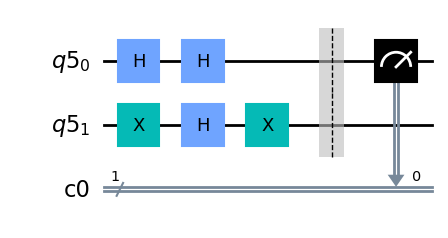

In [21]:
qc.draw('mpl')

<hr>

####part C####

question and intro: explain the following codes.

# **1.Import libraries**

In [ ]:
from sklearn import model_selection, datasets
import numpy as np
import copy
import matplotlib.pyplot as plt


# **2.Install qiskit**

In [ ]:
!pip install qiskit==0.45.0

# **3.Install pylatexenc**

In [ ]:
!pip install pylatexenc

# **4.Import libraries for Quantum Machine Learning**

In [ ]:
from qiskit import *

from qiskit.visualization import circuit_drawer


#**5.Import the Iris dataset and do  train test split**

In [ ]:
iris=datasets.load_iris()
X=iris.data[0:100]
Y=iris.target[0:100]
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.20, random_state=42)
print(Y_train)


[1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1]


In [ ]:
print(X_train)

[[5.7 2.8 4.5 1.3]
 [5.6 3.  4.1 1.3]
 [5.  3.4 1.6 0.4]
 [4.4 3.2 1.3 0.2]
 [5.6 2.5 3.9 1.1]
 [5.7 4.4 1.5 0.4]
 [5.  3.5 1.3 0.3]
 [5.7 2.9 4.2 1.3]
 [4.9 3.1 1.5 0.1]
 [6.3 2.5 4.9 1.5]
 [4.8 3.4 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [6.  3.4 4.5 1.6]
 [5.2 3.4 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.4 3.9 1.7 0.4]
 [5.6 3.  4.5 1.5]
 [6.7 3.1 4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.  3.3 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [5.2 3.5 1.5 0.2]
 [5.1 3.8 1.5 0.3]
 [5.5 2.4 3.7 1. ]
 [5.  3.  1.6 0.2]
 [6.  2.2 4.  1. ]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [4.6 3.4 1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [5.5 3.5 1.3 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [5.7 2.8 4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [5.  3.5 1.6 0.6]
 [7.  3.2 4.7 1.4]
 [5.8 2.7 4.1 1. ]
 [5.1 3.8 1.6 0.2]
 [6.2 2.2 4.5 1.5]
 [5.9 3.  4.2 1.5]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [4.5 2.3 1.3 0.3]
 [6.6 2.9 4.

In [ ]:
print(X_train[0])

[5.7 2.8 4.5 1.3]


# **6. N=4 because in the case of Iris dataset, we have four features**

In [ ]:
N=4

# **7.Rotate the qubits to encode our classical data. This method enables us to get the classical data into the quantum processor. We rotate the angles by our features.**





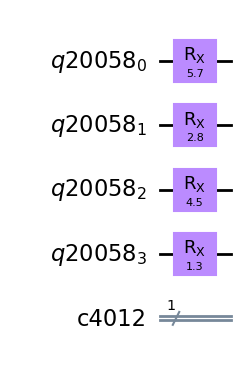

In [ ]:
q=QuantumRegister(N)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

for i, x in enumerate(X_train[0]):
  qc.rx(x,i)

qc.draw('mpl')

# **8.Create a feature map in order to put our data into a quantum processor**

In [ ]:
def feature_map(X):
 q=QuantumRegister(N)
 c=ClassicalRegister(1)
 qc=QuantumCircuit(q,c)
 for i, x in enumerate(X):
  qc.rx(x,i)
 return qc, c



# **9.Put the variational circuit between the barriers. This will allow us to have more rotations. Note that in Quantum Machine Learning, angles are trainable parameters and learned. We initially put random rotations i.e[ np.random.rand(N)]. Thus, QML will try to find the right angles(theta) to classify the iris dataset.The blue lines below are called CNOT gates.CNOT gates create entanglement.This will enable the information to move from one qubit to another qubit. In the end, we only measure one qubit**

In [14]:
def variational_circuit (qc,theta):
  for i in range(N-1):
    qc.cnot(i,i+1)

  qc.cnot(N-1,0)
  for i in range(N):
      qc.ry(theta[i],i)
  return qc

# **10.Run our Quantum Circuit on Qasm Simulator. Then we obtain the counts**

In [ ]:
pip install qiskit-aer

In [ ]:
from qiskit_aer import Aer


<ipython-input-59-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-59-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


{'0': 43468, '1': 56532}
0.56532


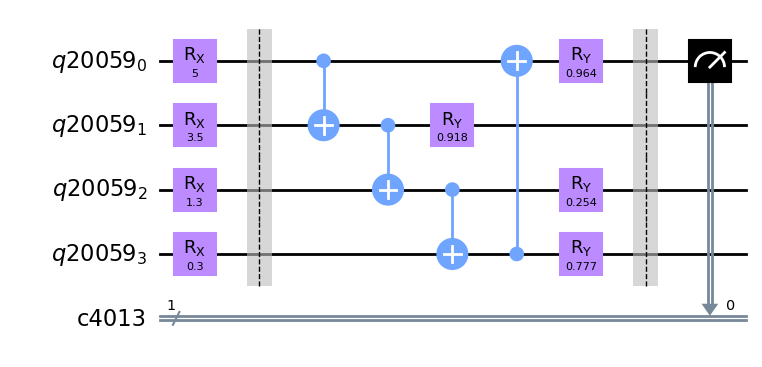

In [ ]:
qc,c=feature_map(X_train[6])
qc.barrier()
qc=variational_circuit(qc,np.random.rand(N))
qc.barrier()
qc.measure(0,c)
shots=1E5
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend, shots=shots)
result=job.result()
counts=result.get_counts(qc)
print(counts)
print(counts['1']/shots)
qc.draw('mpl')


# **11.Now, if we print(Y_train[6])(next cell), we get label 0 which is not the same as label 1 when we use the Qasm Simulator.  The reason is that we have not trained our model yet. So, this is before training.**

In [ ]:
print(Y_train[6])

0


# **12.Create our Quantum Neural Network**

In [ ]:
def quantum_nn(X, theta, simulator =True):
 qc,c=feature_map(X)
 qc=variational_circuit(qc,theta)
 qc.measure(0,c)

 shots=1E5
 backend=Aer.get_backend('qasm_simulator')
 job=execute(qc,backend, shots=shots)
 result=job.result()
 counts=result.get_counts(qc)
 return counts['1']/shots


# **13.Define our loss function**

In [ ]:
def loss(prediction, target):
    return(prediction-target)**2

# **14.Define our Gradient**

In [ ]:
def gradient(X,Y, theta):
  delta=0.01
  grad=[]
  for i in range(len(theta)):
    dtheta=copy.copy(theta)
    dtheta[i] +=delta
    pred1=quantum_nn(X, dtheta)
    pred2=quantum_nn(X, theta)
    grad.append((loss(pred1, Y)-loss(pred2, Y))/delta)
    return np.array(grad)

# **15.Define our accuracy function**

In [ ]:
def accuracy (X,Y, theta):

    counter=0
    for X_i, Y_i in zip(X, Y):
        prediction=quantum_nn(X_i, theta)

        if prediction<0.5 and Y_i==0:
             counter+=1
        elif prediction>=0.5 and Y_i==1:
              counter+=1
    return counter/len(Y)

# **16.Update the variational parameter( theta)**

In [ ]:
eta=0.03
loss_list=[]
theta= np.ones(N)

print('Epoch\t Loss\t Training Accuracy')

for i in range(18):
  loss_tmp=[]
  for X_i, Y_i in zip( X_train, Y_train):
    prediction=quantum_nn(X_i, theta)
    loss_tmp.append(loss(prediction,Y_i))
    theta=theta-eta*gradient(X_i, Y_i, theta)

  loss_list.append(np.mean(loss_tmp))
  acc=accuracy(X_train, Y_train, theta)
  print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')



Epoch	 Loss	 Training Accuracy


<ipython-input-59-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-59-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0 	 0.281 	 0.200
1 	 0.274 	 0.163
2 	 0.264 	 0.225
3 	 0.253 	 0.312
4 	 0.246 	 0.787
5 	 0.246 	 0.775
6 	 0.242 	 0.812
7 	 0.235 	 0.825
8 	 0.229 	 0.812
9 	 0.230 	 0.800
10 	 0.228 	 0.812
11 	 0.224 	 0.812
12 	 0.218 	 0.825
13 	 0.217 	 0.825
14 	 0.215 	 0.800
15 	 0.213 	 0.812
16 	 0.210 	 0.825
17 	 0.209 	 0.812


<function matplotlib.pyplot.show(close=None, block=None)>

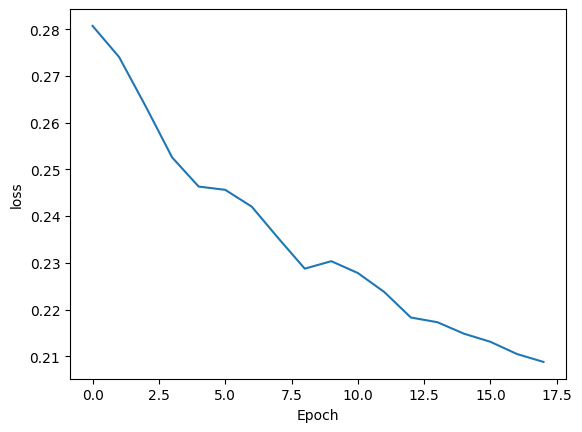

In [ ]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show


In [ ]:
accuracy(X_test,Y_test,theta)

<ipython-input-59-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-59-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0.8

In [ ]:
quantum_nn(X_test[7], theta, simulator=False)

<ipython-input-59-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-59-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)


0.61202

In [ ]:
Y_test[7]

1

References:

(1) Quantum embedding: https://pennylane.ai/qml/glossary/quantum_embedding/

(2) Circuit library: https://docs.quantum.ibm.com/build/circuit-library

(3) amplitude encoding using qiskit: https://quantumcomputing.stackexchange.com/questions/31513/how-does-one-perform-amplitude-encoding-using-only-unitary-gates